# Project 3, Problem 1: Missouri Demographic Study

### Using Esri's USA Tapestry Service for Counties, create a Python Notebook that answers the following questions:
1. For the counties in Missouri only, what is the dominant Tapestry LifeMode Group Name(TLIFENAME)? (10 points)
2. Create a histrogram that shows the number of Missouri counties per Tapestry LifeMode Group Name(TLIFENAME) (5 points)
3. Create a pie chart that shows the number of Missouri counties per Tapestry LifeMode Group Name(TLIFENAME) (5 points)
4. For the counties in Missouri, what is the dominant Dominant Tapestry Segment Name (TSEGNAME) (10 points)
5. Create a histogram that shows the number of Missouri counties per Tapestry Segment Name (TSEGNAME). (5 points)
6. Create a pie chart that shows the number of Missouri counties per Tapestry Segment Name (TSEGNAME). (5 points)
7. Is there Any correlation between LifeMode Group and Segment name? Hint: plot TSEGNAME' vs. TLIFENAME. (2 points)
8. Make sure the notebook is well-documented. (8 points)
9. Bonus Explore the data and show me somethig cool that I haven't thought of. (5 Points)

In [1]:
from arcgis.gis import GIS
gis = GIS("http://slustl.maps.arcgis.com/home", "laurenlovato_slustl")

Enter password: ········


### Access layer from feature service

In [33]:
from arcgis.features import FeatureLayer
lyr_url = 'http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/1'
counties_layer = FeatureLayer(lyr_url)
counties_layer

<FeatureLayer url:"http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/1">

### Query for just the counties in MO

In [27]:
query_MOco = counties_lyr.query(where='"ST_ABBREV"=\'MO\'')
len(query_MOco.features)

115

### Table of TLIFENAME

In [29]:
query_TLIFE = counties_lyr.query(where='"ST_ABBREV"=\'MO\'', out_fields='TLIFENAME')
query_TLIFE.df

,OBJECTID,TLIFENAME,SHAPE
0,1484,Middle Ground,"{'rings': [[[-10280362.7670118, 4916410.069564..."
1,1485,Cozy Country Living,"{'rings': [[[-10531483.9534014, 4884315.773069..."
2,1486,Cozy Country Living,"{'rings': [[[-10616987.3411962, 4950653.710427..."
3,1487,Hometown,"{'rings': [[[-10209994.3775193, 4770334.446140..."
4,1488,Rustic Outposts,"{'rings': [[[-10420742.210988, 4428344.5967196..."
5,1489,Cozy Country Living,"{'rings': [[[-10472244.1734035, 4528665.856542..."
6,1490,Cozy Country Living,"{'rings': [[[-10471351.390976, 4642762.9568824..."
7,1491,Cozy Country Living,"{'rings': [[[-10360213.3509528, 4654569.976182..."
8,1492,Rustic Outposts,"{'rings': [[[-10003900.8116267, 4456719.049613..."
9,1493,Middle Ground,"{'rings': [[[-10276399.9044591, 4757035.729460..."


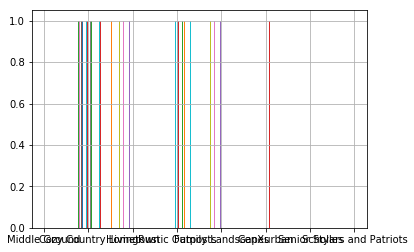

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
query_TLIFE.df['TLIFENAME'].hist()